In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-anxiety-stress-scales-responses/demo1.png
/kaggle/input/depression-anxiety-stress-scales-responses/codebook.txt
/kaggle/input/depression-anxiety-stress-scales-responses/data.csv


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Step-1 Loading and Exploring the DASS Dataset

In [3]:
df = pd.read_csv("/kaggle/input/depression-anxiety-stress-scales-responses/data.csv", delimiter='\t')

In [4]:
# Display basic information about the dataset
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [5]:
# Display the first few rows
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [6]:
# Check for duplicates on each row.
df.duplicated().value_counts()

False    39775
Name: count, dtype: int64

In [7]:
# Check for unique values.
df.nunique()

Q1A               4
Q1I              42
Q1E           10879
Q2A               4
Q2I              42
              ...  
race              7
voted             3
married           4
familysize       28
major          5308
Length: 172, dtype: int64

In [8]:
columns  = df.columns
print('Attributes',columns)

Attributes Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)


In [9]:
for column in columns:
    print(column)

Q1A
Q1I
Q1E
Q2A
Q2I
Q2E
Q3A
Q3I
Q3E
Q4A
Q4I
Q4E
Q5A
Q5I
Q5E
Q6A
Q6I
Q6E
Q7A
Q7I
Q7E
Q8A
Q8I
Q8E
Q9A
Q9I
Q9E
Q10A
Q10I
Q10E
Q11A
Q11I
Q11E
Q12A
Q12I
Q12E
Q13A
Q13I
Q13E
Q14A
Q14I
Q14E
Q15A
Q15I
Q15E
Q16A
Q16I
Q16E
Q17A
Q17I
Q17E
Q18A
Q18I
Q18E
Q19A
Q19I
Q19E
Q20A
Q20I
Q20E
Q21A
Q21I
Q21E
Q22A
Q22I
Q22E
Q23A
Q23I
Q23E
Q24A
Q24I
Q24E
Q25A
Q25I
Q25E
Q26A
Q26I
Q26E
Q27A
Q27I
Q27E
Q28A
Q28I
Q28E
Q29A
Q29I
Q29E
Q30A
Q30I
Q30E
Q31A
Q31I
Q31E
Q32A
Q32I
Q32E
Q33A
Q33I
Q33E
Q34A
Q34I
Q34E
Q35A
Q35I
Q35E
Q36A
Q36I
Q36E
Q37A
Q37I
Q37E
Q38A
Q38I
Q38E
Q39A
Q39I
Q39E
Q40A
Q40I
Q40E
Q41A
Q41I
Q41E
Q42A
Q42I
Q42E
country
source
introelapse
testelapse
surveyelapse
TIPI1
TIPI2
TIPI3
TIPI4
TIPI5
TIPI6
TIPI7
TIPI8
TIPI9
TIPI10
VCL1
VCL2
VCL3
VCL4
VCL5
VCL6
VCL7
VCL8
VCL9
VCL10
VCL11
VCL12
VCL13
VCL14
VCL15
VCL16
education
urban
gender
engnat
age
screensize
uniquenetworklocation
hand
religion
orientation
race
voted
married
familysize
major


In [10]:
# Display all column names
print("\nAvailable Columns in Dataset:\n")
print(df.columns.tolist())


Available Columns in Dataset:

['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E', 'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E', 'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I', 'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A', 'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E', 'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I', 'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A', 'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E', 'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I', 'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A', 'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E', 'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A', 'Q36I', 'Q36E', 'Q37A', 'Q37I', 'Q37E', 'Q38A', 'Q38I', 'Q38E', 'Q39A', 'Q39I', 'Q39E', 'Q40A', 'Q40I', 'Q40E', 'Q41A', 'Q41I', 'Q41E', 'Q42A', 'Q

---------------------------------------------------------------------------------------------------------------------------------------------------------

# Step-2 Data Pre-processing

In [11]:
# Extract columns matching the pattern "Q<number>A"
pattern = r'^Q\d+A$'
scale_column = [column for column in df.columns if re.match(pattern, column)]
# Create a new DataFrame with the extracted columns
extracted_data = df[scale_column]

- This helps in selecting relevant features from survey-based datasets (like Depression, Anxiety, and Stress Scale (DASS)).
- It ensures that only questionnaire responses (ending with "A") are selected for further preprocessing, feature selection, or modeling.

In [12]:
extracted_data

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,...,2,4,1,2,4,4,2,3,1,3
39771,3,4,3,4,3,4,4,4,3,4,...,3,4,3,3,3,4,3,3,3,4
39772,2,1,2,1,1,1,1,1,2,1,...,2,1,1,1,1,1,2,1,1,1
39773,3,1,2,2,3,3,3,4,3,1,...,4,2,3,2,1,2,3,2,4,3


In [13]:
#Check if theres any missing or empty item
extracted_data.isnull().sum()

Q1A     0
Q2A     0
Q3A     0
Q4A     0
Q5A     0
Q6A     0
Q7A     0
Q8A     0
Q9A     0
Q10A    0
Q11A    0
Q12A    0
Q13A    0
Q14A    0
Q15A    0
Q16A    0
Q17A    0
Q18A    0
Q19A    0
Q20A    0
Q21A    0
Q22A    0
Q23A    0
Q24A    0
Q25A    0
Q26A    0
Q27A    0
Q28A    0
Q29A    0
Q30A    0
Q31A    0
Q32A    0
Q33A    0
Q34A    0
Q35A    0
Q36A    0
Q37A    0
Q38A    0
Q39A    0
Q40A    0
Q41A    0
Q42A    0
dtype: int64

In [14]:
#Subtract 1 from all the response to change the scale from 1 to 4 to 0 to 3
def sub(data):
    return data.subtract(1,axis=1)
regularized_dataset=sub(extracted_data) 

# Declare the question key to generate the dataset for each dataset
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Depression_keys = []
for i in DASS_keys["Depression"]:
    Depression_keys.append('Q'+str(i)+'A')
Stress_keys = []
for i in DASS_keys["Stress"]:
    Stress_keys.append('Q'+str(i)+'A')
Anxiety_keys = []
for i in DASS_keys["Anxiety"]:
    Anxiety_keys.append('Q'+str(i)+'A')
depression_dataset= regularized_dataset.filter(Depression_keys)
stress_dataset = regularized_dataset.filter(Stress_keys)
anxiety_dataset = regularized_dataset.filter(Anxiety_keys)

The original responses are on a 1 to 4 scale, but we need them in a 0 to 3 scale for better pre-processing.

The DASS-42 questionnaire consists of 42 questions, categorized into:
- Depression (14 questions)
- Anxiety (14 questions)
- Stress (14 questions)

DASS_keys maps each mental health category to its corresponding question numbers.


In [15]:
#Obtain the total score for each dataset here
def scores(data):
    col=list(data)
    data['Total_Count']=data[col].sum(axis=1)
    return data
depression_dataset=scores(depression_dataset)
stress_dataset=scores(stress_dataset)
anxiety_dataset=scores(anxiety_dataset)

The *.filter(keys)* method extracts only the relevant columns from regularized_dataset:
- depression_dataset → Contains only depression-related questions.
- stress_dataset → Contains only stress-related questions.
- anxiety_dataset → Contains only anxiety-related questions.

In [16]:
depression_dataset.head(10)

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32
5,1,2,1,0,3,1,0,1,0,1,0,1,1,1,13
6,1,3,3,1,3,1,3,2,1,3,2,3,3,2,31
7,0,2,0,0,0,0,0,0,1,0,0,0,0,1,4
8,2,2,2,3,3,2,2,2,3,3,3,3,2,3,35
9,3,3,3,3,3,3,3,3,3,3,3,3,3,3,42


In [17]:
stress_dataset.head(10)

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29
5,0,0,2,0,1,2,0,0,0,2,0,3,2,0,12
6,0,0,2,0,1,1,1,0,0,1,1,3,1,3,14
7,0,1,0,1,0,1,1,0,1,0,0,0,0,1,6
8,3,3,3,3,3,2,3,3,1,3,1,3,1,1,33
9,2,3,3,3,3,3,0,2,3,3,1,3,2,3,34


In [18]:
anxiety_dataset.head(10)

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40
5,0,0,0,2,1,0,1,0,0,0,1,1,0,0,6
6,0,2,2,2,2,0,2,2,1,1,2,1,1,1,19
7,0,0,1,0,1,0,1,0,1,0,0,0,0,0,4
8,3,3,3,3,3,3,3,3,1,3,2,3,3,3,39
9,1,0,2,3,1,3,3,0,2,3,2,3,3,2,28


## Depression Dataset

In [19]:
#Declaring function to assign the label
def condition(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>=28:
        return 'Extremely Severe'

#Apply the condition and drop the "Total_Count" column
depression_dataset['Label']=depression_dataset['Total_Count'].apply(condition)
final_depression_dataset = depression_dataset.drop(columns=['Total_Count'])
final_depression_dataset.head(10)

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Label
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,Severe
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,Severe
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,Moderate
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,Extremely Severe
5,1,2,1,0,3,1,0,1,0,1,0,1,1,1,Mild
6,1,3,3,1,3,1,3,2,1,3,2,3,3,2,Extremely Severe
7,0,2,0,0,0,0,0,0,1,0,0,0,0,1,Normal
8,2,2,2,3,3,2,2,2,3,3,3,3,2,3,Extremely Severe
9,3,3,3,3,3,3,3,3,3,3,3,3,3,3,Extremely Severe


Label
Extremely Severe    13577
Severe               6477
Moderate             7079
Mild                 3786
Normal               8856
Name: count, dtype: int64


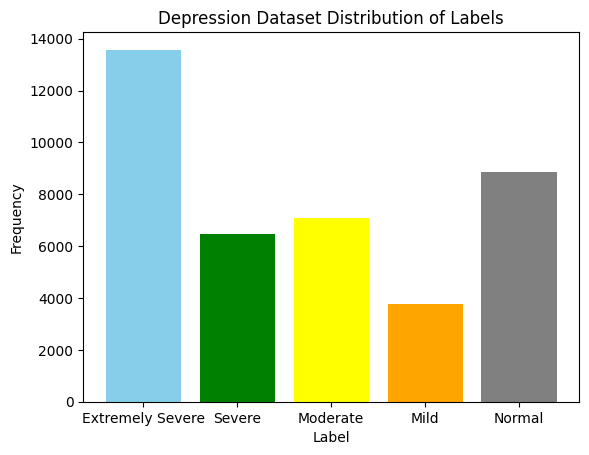

In [20]:
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

# Count the frequency of each label
label_counts = final_depression_dataset['Label'].value_counts()
print(label_counts.reindex(desired_labels))

# Define the colors for each bar
colors = ['skyblue', 'green', 'yellow', 'orange', 'gray']

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values, color=colors)

# Plot the bar chart
# plt.bar(label_counts.index, label_counts.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Depression Dataset Distribution of Labels')

# Show the plot
plt.show()

## Stress Dataset

In [21]:
#Declaring function to assign the label
def condition(x):
    if x<=14:
        return 'Normal'
    if  15<=x<=18:
        return 'Mild'
    if 19<=x<=25:
        return 'Moderate'
    if 26<=x<=33:
        return 'Severe'
    if x>=34:
        return 'Extremely Severe'

#Apply the condition and drop the "Total_Count" column
stress_dataset['Label']=stress_dataset['Total_Count'].apply(condition)
final_stress_dataset = stress_dataset.drop(columns=['Total_Count'])
final_stress_dataset.head(10)

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Label
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,Extremely Severe
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,Severe
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,Mild
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,Mild
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,Severe
5,0,0,2,0,1,2,0,0,0,2,0,3,2,0,Normal
6,0,0,2,0,1,1,1,0,0,1,1,3,1,3,Normal
7,0,1,0,1,0,1,1,0,1,0,0,0,0,1,Normal
8,3,3,3,3,3,2,3,3,1,3,1,3,1,1,Severe
9,2,3,3,3,3,3,0,2,3,3,1,3,2,3,Extremely Severe


Label
Extremely Severe     5749
Severe               8575
Moderate             8730
Mild                 4921
Normal              11800
Name: count, dtype: int64


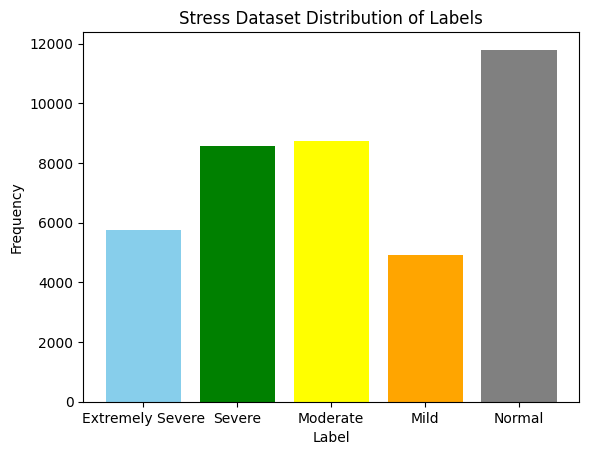

In [22]:
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

# Count the frequency of each label
label_counts = final_stress_dataset['Label'].value_counts()
print(label_counts.reindex(desired_labels))

# Define the colors for each bar
colors = ['skyblue', 'green', 'yellow', 'orange', 'gray']

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Stress Dataset Distribution of Labels')

# Show the plot
plt.show()

## Anxiety Dataset

In [23]:
#Declaring function to assign the label
def condition(x):
    if x<=7:
        return 'Normal'
    if  8<=x<=9:
        return 'Mild'
    if 10<=x<=14:
        return 'Moderate'
    if 15<=x<=19:
        return 'Severe'
    if x>19:
        return 'Extremely Severe'

#Apply the condition and drop the "Total_Count" column
anxiety_dataset['Label']=anxiety_dataset['Total_Count'].apply(condition)
final_anxiety_dataset = anxiety_dataset.drop(columns=['Total_Count'])
final_anxiety_dataset.head(10)

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Label
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,Severe
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,Moderate
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,Severe
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,Extremely Severe
5,0,0,0,2,1,0,1,0,0,0,1,1,0,0,Normal
6,0,2,2,2,2,0,2,2,1,1,2,1,1,1,Severe
7,0,0,1,0,1,0,1,0,1,0,0,0,0,0,Normal
8,3,3,3,3,3,3,3,3,1,3,2,3,3,3,Extremely Severe
9,1,0,2,3,1,3,3,0,2,3,2,3,3,2,Extremely Severe


Label
Extremely Severe    14122
Severe               6113
Moderate             7048
Mild                 2764
Normal               9728
Name: count, dtype: int64


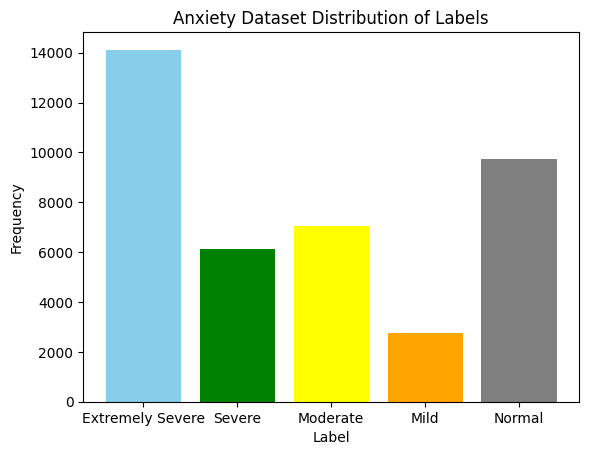

In [24]:
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

# Count the frequency of each label
label_counts = final_anxiety_dataset['Label'].value_counts()
print(label_counts.reindex(desired_labels))

# Define the colors for each bar
colors = ['skyblue', 'green', 'yellow', 'orange', 'gray']

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Anxiety Dataset Distribution of Labels')

# Show the plot
plt.show()

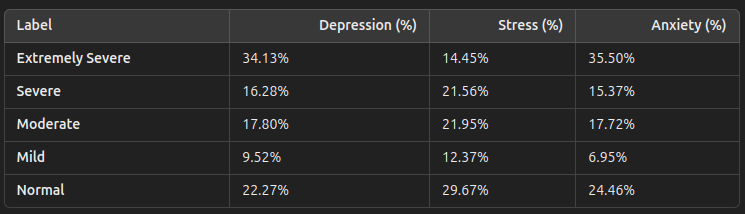

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Define label encoding mapping
label_mapping = {'Normal': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Extremely Severe': 4}

# Encode labels
final_depression_dataset['Label'] = final_depression_dataset['Label'].map(label_mapping)
final_stress_dataset['Label'] = final_stress_dataset['Label'].map(label_mapping)
final_anxiety_dataset['Label'] = final_anxiety_dataset['Label'].map(label_mapping)

The labels ('Normal', 'Mild', 'Moderate', 'Severe', 'Extremely Severe') are converted into numerical values (0 to 4).

This encoding is necessary for SMOTE, which works with numerical data.

import numpy as np

import pandas as pd

from sklearn.neighbors import NearestNeighbors

class CustomSMOTE:
    
    def __init__(self, sampling_ratio=1.0, k_neighbors=5, alpha=0.5, random_state=42):
        """
        Custom SMOTE implementation.
        - sampling_ratio: Determines how much to oversample the minority class.
        - k_neighbors: Number of nearest neighbors to consider for generating synthetic points.
        - alpha: Controls interpolation weight (0 = close to original, 1 = close to neighbor).
        """
        self.sampling_ratio = sampling_ratio
        self.k_neighbors = k_neighbors
        self.alpha = alpha
        np.random.seed(random_state)

    def fit_resample(self, X, y):
        """Apply custom SMOTE on the dataset."""
        # Identify minority and majority classes
        class_counts = y.value_counts()
        minority_class = class_counts.idxmin()
        majority_class = class_counts.idxmax()

        X_minority = X[y == minority_class]
        X_majority = X[y == majority_class]

        # Compute number of synthetic samples needed
        n_minority = len(X_minority)
        n_majority = len(X_majority)
        n_synthetic = int((n_majority - n_minority) * self.sampling_ratio)

        # Fit k-NN on minority class
        knn = NearestNeighbors(n_neighbors=self.k_neighbors)
        knn.fit(X_minority)

        synthetic_samples = []
        for _ in range(n_synthetic):
            # Randomly select a minority sample
            idx = np.random.randint(0, n_minority)
            sample = X_minority.iloc[idx].values

            # Find nearest neighbors
            neighbors = knn.kneighbors([sample], return_distance=False)[0]
            chosen_neighbor = X_minority.iloc[np.random.choice(neighbors)].values

            # Generate a synthetic sample using modified interpolation
            lam = np.random.beta(self.alpha, 1 - self.alpha)  # Weighted interpolation
            synthetic_sample = sample + lam * (chosen_neighbor - sample)
            synthetic_samples.append(synthetic_sample)

        # Convert synthetic samples to DataFrame
        X_synthetic = pd.DataFrame(synthetic_samples, columns=X.columns)
        y_synthetic = pd.Series([minority_class] * len(X_synthetic))

        # Concatenate original data with synthetic samples
        X_resampled = pd.concat([X, X_synthetic], ignore_index=True)
        y_resampled = pd.concat([y, y_synthetic], ignore_index=True)

        return X_resampled, y_resampled

#### Example Usage

custom_smote = CustomSMOTE(sampling_ratio=1.0, k_neighbors=5, alpha=0.7)

X_depression_resampled, y_depression_resampled = custom_smote.fit_resample(X_depression, y_depression)

Key Modifications in this Custom SMOTE
1. Weighted Interpolation (alpha)
- Instead of random interpolation, we use a beta-distributed weight (λ) to favor realistic samples.
- A higher alpha makes synthetic samples closer to original data points, while a lower alpha creates more variation.

2. Adaptive Neighbor Selection
- We use k-NN but introduce random selection within the nearest neighbors to ensure diversity in synthetic points.

3. Feature-Specific Constraints (Optional for Domain-Specific Modifications)
- We can apply feature-wise constraints to prevent unrealistic data points, e.g., ensuring depression severity does not exceed a threshold.


**Hybrid SMOTE-ADASYN:** Use density-based generation (more synthetic samples for harder-to-classify cases). \
**Gaussian Noise Addition:** Add controlled noise to prevent synthetic samples from clustering too closely.

In [26]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Separate features and labels
X_depression = final_depression_dataset.drop(columns=['Label'])
y_depression = final_depression_dataset['Label']

X_stress = final_stress_dataset.drop(columns=['Label'])
y_stress = final_stress_dataset['Label']

X_anxiety = final_anxiety_dataset.drop(columns=['Label'])
y_anxiety = final_anxiety_dataset['Label']

# Apply SMOTE
X_depression_resampled, y_depression_resampled = smote.fit_resample(X_depression, y_depression)
X_stress_resampled, y_stress_resampled = smote.fit_resample(X_stress, y_stress)
X_anxiety_resampled, y_anxiety_resampled = smote.fit_resample(X_anxiety, y_anxiety)

- Features (X) and labels (y) are separated for each dataset (Depression, Stress, Anxiety).
- SMOTE generates synthetic samples to ensure each class has an equal number of instances.
- Resampling is applied separately for each dataset.

In [27]:
# Reverse label mapping
reverse_mapping = {v: k for k, v in label_mapping.items()}

y_depression_resampled = y_depression_resampled.map(reverse_mapping)
y_stress_resampled = y_stress_resampled.map(reverse_mapping)
y_anxiety_resampled = y_anxiety_resampled.map(reverse_mapping)

After SMOTE, labels are converted back to their original string representation (e.g., "Moderate" instead of 2).

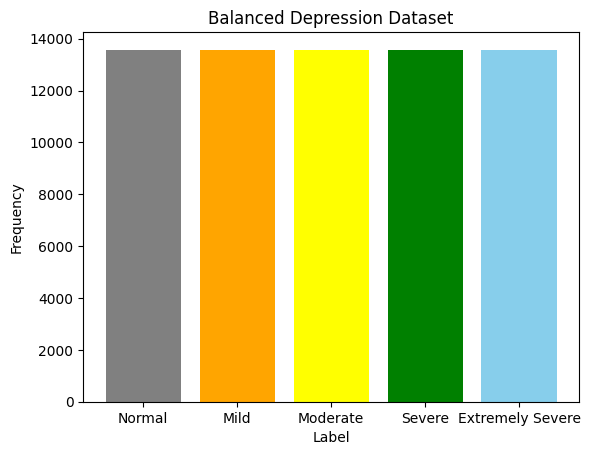

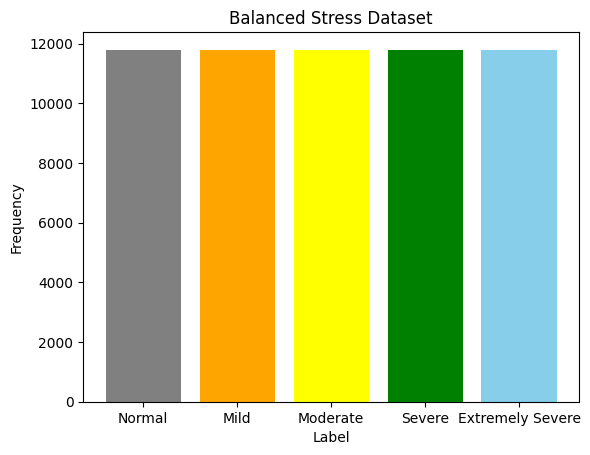

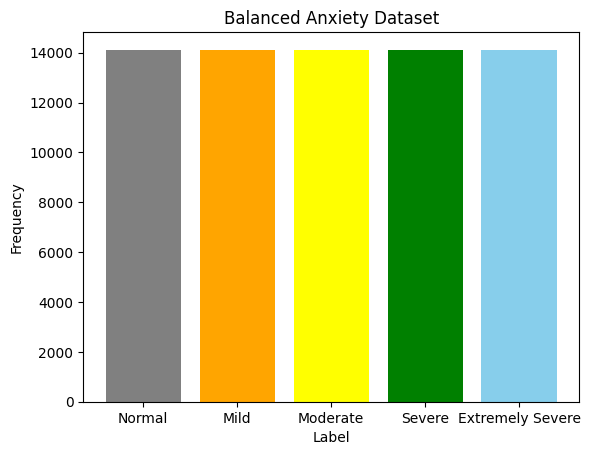

In [28]:
import matplotlib.pyplot as plt

# Function to plot class distribution
def plot_class_distribution(y_resampled, title):
    label_counts = y_resampled.value_counts().reindex(label_mapping.keys())
    
    colors = ['gray', 'orange', 'yellow', 'green', 'skyblue']
    plt.bar(label_counts.index, label_counts.values, color=colors)
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Plot distributions after SMOTE
plot_class_distribution(y_depression_resampled, "Balanced Depression Dataset")
plot_class_distribution(y_stress_resampled, "Balanced Stress Dataset")
plot_class_distribution(y_anxiety_resampled, "Balanced Anxiety Dataset")

**SUMMARY**
- Encodes categorical labels into numerical format for ML compatibility
- Applies SMOTE to balance class distributions by generating synthetic samples
- Converts numerical labels back to their original categorical form
- Plots balanced class distributions to verify the effectiveness of SMOTE

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode labels for Depression
y_depression_resampled_encoded = label_encoder.fit_transform(y_depression_resampled)

# Encode labels for Stress
y_stress_resampled_encoded = label_encoder.fit_transform(y_stress_resampled)

# Encode labels for Anxiety
y_anxiety_resampled_encoded = label_encoder.fit_transform(y_anxiety_resampled)

The categorical labels (Normal, Mild, Moderate, Severe, Extremely Severe) are converted into numerical values (0 to 4).
This is necessary because XGBoost requires numerical labels for multi-class classification.

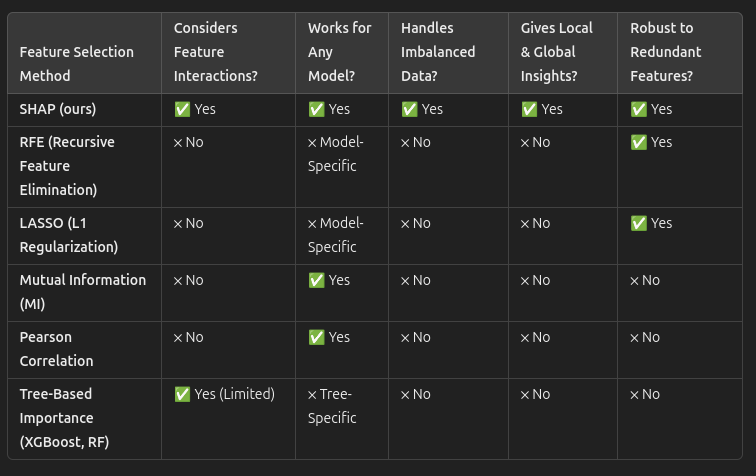

In [34]:
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def train_xgboost_and_shap(X, y, dataset_name):
    # Ensure X is a DataFrame with column names
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    
    X.columns = [f"Feature_{i}" for i in range(X.shape[1])]  # Assign feature names

    # Train XGBoost Model
    model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
    model.fit(X, y)

    # Use TreeExplainer for faster SHAP computation
    explainer = shap.TreeExplainer(model)
    
    # Subsample the dataset for SHAP computation
    sample_size = min(1000, X.shape[0])  # Use at most 1000 samples
    X_sampled = X.sample(sample_size, random_state=42)

    shap_values = explainer.shap_values(X_sampled, approximate=True)  # Approximate SHAP for speed

    # Plot summary plot of feature importance
    shap.summary_plot(shap_values, X_sampled, feature_names=X_sampled.columns)

    return model, shap_values

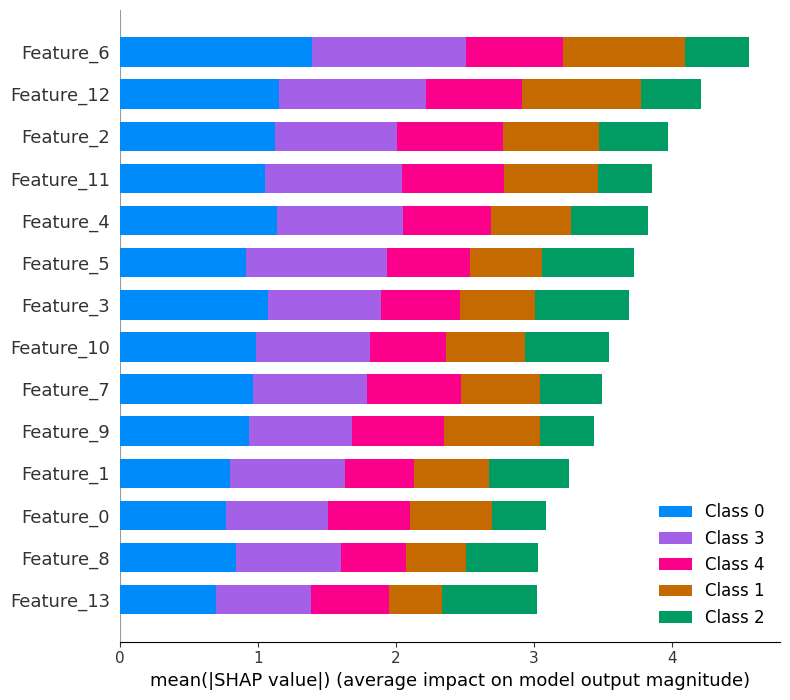

In [35]:
# Train on Depression Dataset
xgb_depression, shap_depression = train_xgboost_and_shap(X_depression_resampled, y_depression_resampled_encoded, "Depression")

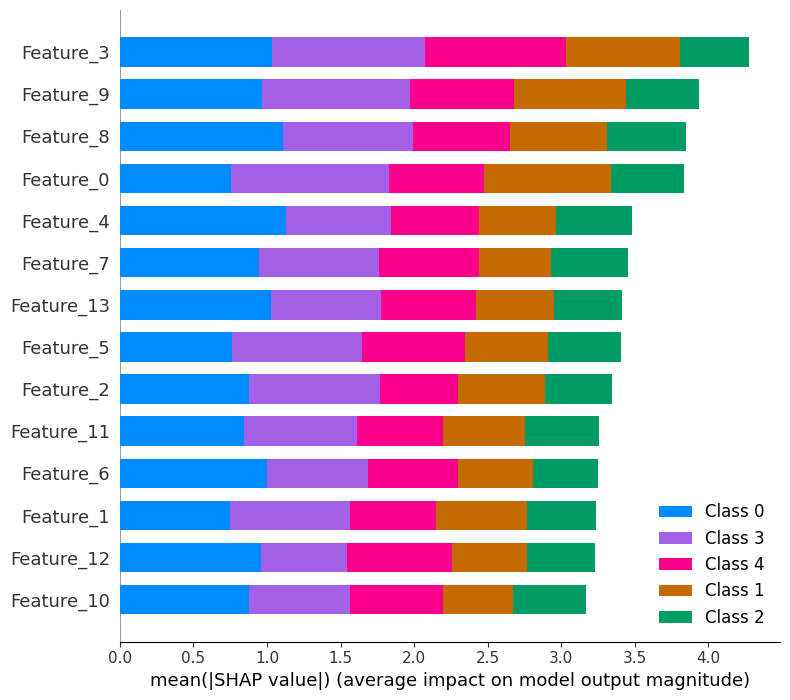

In [36]:
# Train on Stress Dataset
xgb_stress, shap_stress = train_xgboost_and_shap(X_stress_resampled, y_stress_resampled_encoded, "Stress")

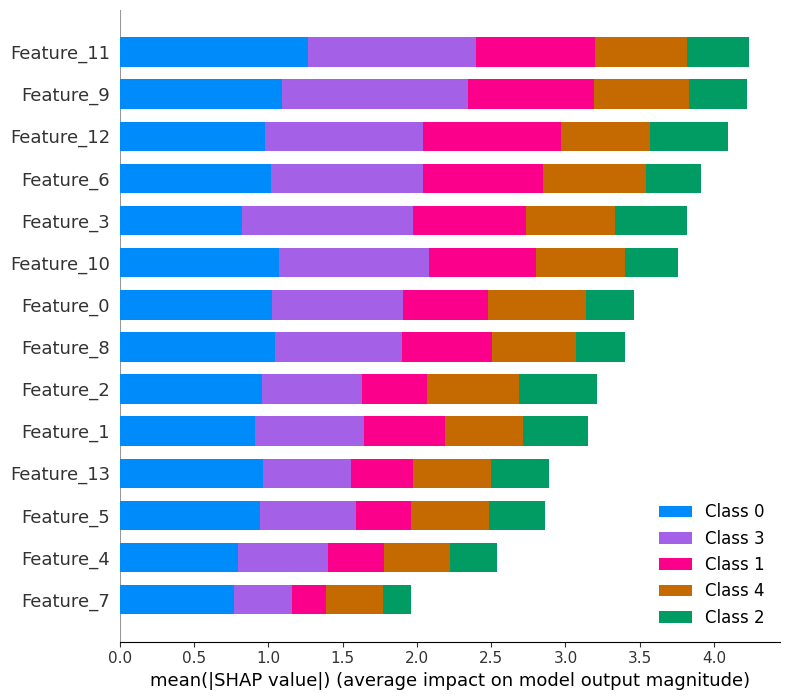

In [37]:
# Train on Anxiety Dataset
xgb_anxiety, shap_anxiety = train_xgboost_and_shap(X_anxiety_resampled, y_anxiety_resampled_encoded, "Anxiety")

In [38]:
def select_features_shap(shap_values, X, top_n=20):
    """Selects top N features based on SHAP importance in multi-class classification"""
    if isinstance(shap_values, list):
        # Convert multi-class SHAP to single importance score (mean across classes)
        shap_importance = np.mean([np.abs(sv).mean(axis=0) for sv in shap_values], axis=0)
    else:
        # For binary classification, directly compute mean absolute SHAP values
        shap_importance = np.abs(shap_values).mean(axis=0)
    
    # Create a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({
        "Feature": X.columns,
        "SHAP Importance": shap_importance
    }).sort_values(by="SHAP Importance", ascending=False)

    # Select top N features
    top_features = feature_importance_df.head(top_n)["Feature"].tolist()
    
    # Reduce dataset to selected features
    X_selected = X[top_features]

    print(f"Selected {top_n} features based on SHAP importance")
    
    return X_selected, top_features

In [39]:
X_selected_depression, top_features_depression = select_features_shap(shap_depression, X_depression_resampled)

Selected 20 features based on SHAP importance


In [40]:
X_selected_stress, top_features_stress = select_features_shap(shap_stress, X_stress_resampled)

Selected 20 features based on SHAP importance


In [41]:
X_selected_anxiety, top_features_anxiety = select_features_shap(shap_anxiety, X_anxiety_resampled)

Selected 20 features based on SHAP importance


In [42]:
print("🔹 Top Features for Depression:", top_features_depression)
print("🔹 Top Features for Stress:", top_features_stress)
print("🔹 Top Features for Anxiety:", top_features_anxiety)

🔹 Top Features for Depression: ['Feature_6', 'Feature_12', 'Feature_2', 'Feature_11', 'Feature_4', 'Feature_5', 'Feature_3', 'Feature_10', 'Feature_7', 'Feature_9', 'Feature_1', 'Feature_0', 'Feature_8', 'Feature_13']
🔹 Top Features for Stress: ['Feature_3', 'Feature_9', 'Feature_8', 'Feature_0', 'Feature_4', 'Feature_7', 'Feature_13', 'Feature_5', 'Feature_2', 'Feature_11', 'Feature_6', 'Feature_1', 'Feature_12', 'Feature_10']
🔹 Top Features for Anxiety: ['Feature_11', 'Feature_9', 'Feature_12', 'Feature_6', 'Feature_3', 'Feature_10', 'Feature_0', 'Feature_8', 'Feature_2', 'Feature_1', 'Feature_13', 'Feature_5', 'Feature_4', 'Feature_7']


In [43]:
common_features = set(top_features_depression) & set(top_features_stress) & set(top_features_anxiety)
print("🔹 Common Features Across All:", list(common_features))

🔹 Common Features Across All: ['Feature_5', 'Feature_3', 'Feature_6', 'Feature_1', 'Feature_12', 'Feature_8', 'Feature_11', 'Feature_13', 'Feature_0', 'Feature_9', 'Feature_10', 'Feature_4', 'Feature_2', 'Feature_7']


In [44]:
common_features = list(common_features)  # Convert set to list

X_depression_final = X_depression_resampled[common_features]
X_stress_final = X_stress_resampled[common_features]
X_anxiety_final = X_anxiety_resampled[common_features]

In [45]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

def select_features_rfe(X, y, dataset_name, n_features=10):
    """Apply Recursive Feature Elimination (RFE) with XGBoost."""
    
    # Initialize XGBoost classifier
    model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")

    # Apply RFE
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X, y)

    # Get selected features
    selected_features = X.columns[rfe.support_].tolist()
    
    print(f"🔹 Top {n_features} Features for {dataset_name} after RFE: {selected_features}")

    # Return new dataset with selected features
    return X[selected_features], selected_features

In [46]:
# Ensure labels are encoded as integers for RFE
y_depression_resampled_encoded = label_encoder.transform(y_depression_resampled)
y_stress_resampled_encoded = label_encoder.transform(y_stress_resampled)
y_anxiety_resampled_encoded = label_encoder.transform(y_anxiety_resampled)

# Apply RFE on each dataset
X_depression_final, selected_features_depression = select_features_rfe(X_depression_resampled[common_features], y_depression_resampled_encoded, "Depression")
X_stress_final, selected_features_stress = select_features_rfe(X_stress_resampled[common_features], y_stress_resampled_encoded, "Stress")
X_anxiety_final, selected_features_anxiety = select_features_rfe(X_anxiety_resampled[common_features], y_anxiety_resampled_encoded, "Anxiety")

🔹 Top 10 Features for Depression after RFE: ['Feature_3', 'Feature_6', 'Feature_1', 'Feature_12', 'Feature_0', 'Feature_9', 'Feature_10', 'Feature_4', 'Feature_2', 'Feature_7']
🔹 Top 10 Features for Stress after RFE: ['Feature_3', 'Feature_8', 'Feature_11', 'Feature_13', 'Feature_0', 'Feature_9', 'Feature_10', 'Feature_4', 'Feature_2', 'Feature_7']
🔹 Top 10 Features for Anxiety after RFE: ['Feature_3', 'Feature_6', 'Feature_1', 'Feature_12', 'Feature_8', 'Feature_11', 'Feature_13', 'Feature_9', 'Feature_2', 'Feature_7']


This implementation applies Recursive Feature Elimination (RFE) with XGBoost to select the top features.

In [63]:
models = ["XGBoost", "Random Forest", "KNN", "Decision Tree", "Naive Bayes"]
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Store model results
model_results = {
    "Depression": [],
    "Anxiety": [],
    "Stress": []
}

def train_and_evaluate_single_model(X, y, model_name, dataset_name):
    """Train and evaluate a model, returning all metrics."""
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    if model_name == "XGBoost":
        model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
    elif model_name == "Random Forest":
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_name == "KNN":
        model = KNeighborsClassifier(n_neighbors=5)
    elif model_name == "Decision Tree":
        model = DecisionTreeClassifier(random_state=42)
    elif model_name == "Naive Bayes":
        model = GaussianNB()
    else:
        raise ValueError("Unsupported model name.")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted') 
    f1 = f1_score(y_test, y_pred, average='weighted') 

    
    print(f"{dataset_name} - {model_name} \nAccuracy: {accuracy:.4f}, \nPrecision: {precision:.4f}, \nRecall: {recall:.4f}, \nF1: {f1:.4f}")
    
    # Store results for plotting
    model_results[dataset_name].append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })
    
    return model
for dataset_name, X, y in [
    ("Depression", X_depression_final, y_depression_resampled_encoded),
    ("Anxiety", X_anxiety_final, y_anxiety_resampled_encoded),
    ("Stress", X_stress_final, y_stress_resampled_encoded)]:
    
    print(f"\n Training and Evaluating {dataset_name} dataset models:")
    
    for model in models:
        train_and_evaluate_single_model(X, y, model, dataset_name)


 Training and Evaluating Depression dataset models:
Depression - XGBoost 
Accuracy: 0.8367, 
Precision: 0.8420, 
Recall: 0.8367, 
F1: 0.8371
Depression - Random Forest 
Accuracy: 0.8397, 
Precision: 0.8444, 
Recall: 0.8397, 
F1: 0.8399
Depression - KNN 
Accuracy: 0.8228, 
Precision: 0.8272, 
Recall: 0.8228, 
F1: 0.8230
Depression - Decision Tree 
Accuracy: 0.8108, 
Precision: 0.8160, 
Recall: 0.8108, 
F1: 0.8111
Depression - Naive Bayes 
Accuracy: 0.7900, 
Precision: 0.8076, 
Recall: 0.7900, 
F1: 0.7924

 Training and Evaluating Anxiety dataset models:
Anxiety - XGBoost 
Accuracy: 0.7329, 
Precision: 0.7404, 
Recall: 0.7329, 
F1: 0.7336
Anxiety - Random Forest 
Accuracy: 0.7390, 
Precision: 0.7447, 
Recall: 0.7390, 
F1: 0.7394
Anxiety - KNN 
Accuracy: 0.7145, 
Precision: 0.7236, 
Recall: 0.7145, 
F1: 0.7163
Anxiety - Decision Tree 
Accuracy: 0.7119, 
Precision: 0.7187, 
Recall: 0.7119, 
F1: 0.7121
Anxiety - Naive Bayes 
Accuracy: 0.6704, 
Precision: 0.6858, 
Recall: 0.6704, 
F1: 0.673

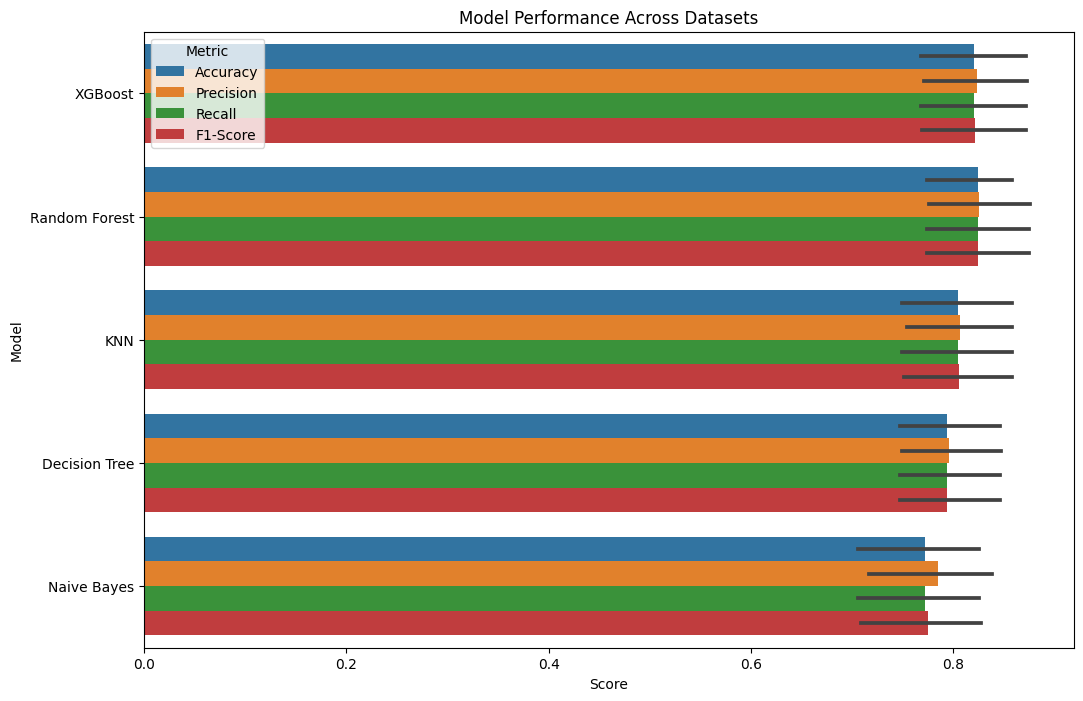

In [61]:
def plot_model_performance(model_results):
    """Plot model accuracy, precision, recall, and F1-score for each dataset."""
    results_df = []

    for dataset, models in model_results.items():
        for model_data in models:
            results_df.append({
                "Dataset": dataset,
                "Model": model_data["Model"],
                "Metric": "Accuracy",
                "Score": model_data["Accuracy"]
            })
            results_df.append({
                "Dataset": dataset,
                "Model": model_data["Model"],
                "Metric": "Precision",
                "Score": model_data["Precision"]
            })
            results_df.append({
                "Dataset": dataset,
                "Model": model_data["Model"],
                "Metric": "Recall",
                "Score": model_data["Recall"]
            })
            results_df.append({
                "Dataset": dataset,
                "Model": model_data["Model"],
                "Metric": "F1-Score",
                "Score": model_data["F1-Score"]
            })

    results_df = pd.DataFrame(results_df)

    plt.figure(figsize=(12, 8))
    sns.barplot(x="Score", y="Model", hue="Metric", data=results_df)
    plt.title("Model Performance Across Datasets")
    plt.xlabel("Score")
    plt.ylabel("Model")
    # plt.legend(title="Metric")
    plt.show()

# Plot the results
plot_model_performance(model_results)

### Stacking Ensemble with a Deep Neural Network (DNN) as a Meta-Learner

**How the Stacking Model Works**
1. Train Base Models:
- Five different models (XGBoost, Random Forest, KNN, Decision Tree, Naïve Bayes) are trained on the Depression Dataset.
- Each base model predicts on both training and test sets.
- These predictions become the meta-features for the DNN meta-learner.

2. Train the Meta-Learner (DNN):
- The meta-features (stacked predictions) serve as input to a three-layer DNN.
- The DNN predicts the final classification for depression severity.

3. Activation functions:
- ReLU for hidden layers → Helps with non-linearity.
- Sigmoid for output → Since it’s a binary classification problem.

4. Optimizer: Adam (fast convergence).
5. Loss Function: Binary Crossentropy (since it's a binary classification task).
6. Performance Evaluation: Computes Accuracy, Precision, Recall, and F1 Score on the test set.

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Function to train base models and get meta-features
def train_base_models(X_train, X_test, y_train):
    base_models = {
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Naive Bayes": GaussianNB()
    }
    
    meta_features_train = []
    meta_features_test = []
    
    for name, model in base_models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train).reshape(-1, 1)
        y_test_pred = model.predict(X_test).reshape(-1, 1)
        
        meta_features_train.append(y_train_pred)
        meta_features_test.append(y_test_pred)
    
    # Stack predictions horizontally to form meta-feature matrix
    meta_features_train = np.hstack(meta_features_train)
    meta_features_test = np.hstack(meta_features_test)
    
    return meta_features_train, meta_features_test

In [52]:
# Function to build and train DNN Meta-Learner
def train_dnn_meta_learner(X_meta_train, X_meta_test, y_train, y_test):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')  # Binary Classification
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(X_meta_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_meta_test, y_test))
    
    y_pred = (model.predict(X_meta_test) > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"🔹 Stacking Ensemble with DNN Meta-Learner - Evaluation Metrics")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [53]:
# Prepare Data
scaler = StandardScaler()
X_depression_scaled = scaler.fit_transform(X_depression_final)
X_train, X_test, y_train, y_test = train_test_split(X_depression_scaled, y_depression_resampled_encoded, test_size=0.2, random_state=42)

In [50]:
# Train Base Models and Get Meta-Features
X_meta_train, X_meta_test = train_base_models(X_train, X_test, y_train)

In [51]:
# Train DNN Meta-Learner
train_dnn_meta_learner(X_meta_train, X_meta_test, y_train, y_test)

Epoch 1/20
3395/3395 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.2008 - loss: -200156.4062 - val_accuracy: 0.1964 - val_loss: -2556396.0000
Epoch 2/20
3395/3395 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2029 - loss: -4853862.5000 - val_accuracy: 0.1964 - val_loss: -14162107.0000
Epoch 3/20
3395/3395 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2003 - loss: -19913438.0000 - val_accuracy: 0.1964 - val_loss: -38208688.0000
Epoch 4/20
3395/3395 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2010 - loss: -48435200.0000 - val_accuracy: 0.1964 - val_loss: -78041280.0000
Epoch 5/20
3395/3395 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2009 - loss: -94395144.0000 - val_accuracy: 0.1964 - val_loss: -137059568.0000
Epoch 6/20
3395/3395 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1991 - loss: -162295696.0000 - val_accuracy: 0.1964 - val_loss: -218524192.0000
Epoch 7/20
3395/3395 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2019 - loss: -253319056.0000 - val_accuracy: 0.1964 - val

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

### Hybrid DNN-XGBoost model

DNN for Feature Learning

- The DNN extracts embeddings (meaningful representations) from raw features.
- The 128-dimensional embeddings capture non-linear relationships in data.

XGBoost for Final Classification

- XGBoost is a powerful ensemble model that handles structured tabular data well.
- It uses the extracted embeddings instead of raw features, leading to better generalization.

Avoids Overfitting

- Dropout layers (30%) help prevent overfitting in DNN.
- XGBoost reduces bias-variance tradeoff effectively.

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_depression_final, y_depression_resampled_encoded, test_size=0.2, random_state=42
)

# Ensure y_train and y_test are integer-encoded
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

# Determine the number of classes dynamically
num_classes = len(np.unique(y_train))

# Define the DNN model for feature extraction
dnn_model = Sequential([
    Input(shape=(X_train.shape[1],), name='input_layer'),
    Dense(256, activation='relu'),
    Dropout(0.3),  # Reduce overfitting
    Dense(128, activation='relu', name='embedding_layer'),  # Embedding Layer
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
dnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Instead of using dnn_model.input, use the input of the first layer:
embedding_model = Model(inputs=dnn_model.layers[0].input, outputs=dnn_model.get_layer("embedding_layer").output)

# Extract embeddings from the trained DNN
X_train_embeddings = embedding_model.predict(X_train)
X_test_embeddings = embedding_model.predict(X_test)

print("Shape of extracted embeddings for training data:", X_train_embeddings.shape)
print("Shape of extracted embeddings for test data:", X_test_embeddings.shape)

# Train XGBoost on extracted embeddings
xgb_model = XGBClassifier(use_label_encoder=False, objective="multi:softmax", num_class=num_classes)
xgb_model.fit(X_train_embeddings, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test_embeddings)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nHybrid DNN-XGBoost Model Performance")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/50
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6766 - loss: 0.7199 - val_accuracy: 0.8224 - val_loss: 0.4152
Epoch 2/50
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8180 - loss: 0.4347 - val_accuracy: 0.8452 - val_loss: 0.3642
Epoch 3/50
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8332 - loss: 0.4016 - val_accuracy: 0.8507 - val_loss: 0.3571
Epoch 4/50
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8323 - loss: 0.3970 - val_accuracy: 0.8534 - val_loss: 0.3517
Epoch 5/50
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8349 - loss: 0.3894 - val_accuracy: 0.8543 - val_loss: 0.3557
Epoch 6/50
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8384 - loss: 0.3848 - val_accuracy: 0.8514 - val_loss: 0.3519
Epoch 7/50
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8409 - loss: 0.3757 - val_accuracy: 0.8564 - val_loss: 0.3417
Epoch 8/50
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8416 - loss: 0.3792 - 

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_anxiety_final, y_anxiety_resampled_encoded, test_size=0.2, random_state=42
)

# Ensure y_train and y_test are integer-encoded
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

# Determine the number of classes dynamically
num_classes = len(np.unique(y_train))

# Define the DNN model for feature extraction
dnn_model = Sequential([
    Input(shape=(X_train.shape[1],), name='input_layer'),
    Dense(256, activation='relu'),
    Dropout(0.3),  # Reduce overfitting
    Dense(128, activation='relu', name='embedding_layer'),  # Embedding Layer
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
dnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Instead of using dnn_model.input, use the input of the first layer:
embedding_model = Model(inputs=dnn_model.layers[0].input, outputs=dnn_model.get_layer("embedding_layer").output)

# Extract embeddings from the trained DNN
X_train_embeddings = embedding_model.predict(X_train)
X_test_embeddings = embedding_model.predict(X_test)

print("Shape of extracted embeddings for training data:", X_train_embeddings.shape)
print("Shape of extracted embeddings for test data:", X_test_embeddings.shape)

# Train XGBoost on extracted embeddings
xgb_model = XGBClassifier(use_label_encoder=False, objective="multi:softmax", num_class=num_classes)
xgb_model.fit(X_train_embeddings, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test_embeddings)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nHybrid DNN-XGBoost Model Performance")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/50
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6148 - loss: 0.8483 - val_accuracy: 0.7413 - val_loss: 0.5877
Epoch 2/50
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7296 - loss: 0.6212 - val_accuracy: 0.7383 - val_loss: 0.5924
Epoch 3/50
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7380 - loss: 0.6050 - val_accuracy: 0.7449 - val_loss: 0.5885
Epoch 4/50
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7403 - loss: 0.5990 - val_accuracy: 0.7490 - val_loss: 0.5733
Epoch 5/50
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7425 - loss: 0.5899 - val_accuracy: 0.7491 - val_loss: 0.5727
Epoch 6/50
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7433 - loss: 0.5913 - val_accuracy: 0.7495 - val_loss: 0.5729
Epoch 7/50
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7445 - loss: 0.5891 - val_accuracy: 0.7394 - val_loss: 0.5878
Epoch 8/50
1766/1766 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7437 - loss: 0.5861 - 

In [59]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_stress_final, y_stress_resampled_encoded, test_size=0.2, random_state=42
)

# Ensure y_train and y_test are integer-encoded
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

# Determine the number of classes dynamically
num_classes = len(np.unique(y_train))

# Define the DNN model for feature extraction
dnn_model = Sequential([
    Input(shape=(X_train.shape[1],), name='input_layer'),
    Dense(256, activation='relu'),
    Dropout(0.3),  # Reduce overfitting
    Dense(128, activation='relu', name='embedding_layer'),  # Embedding Layer
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
dnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Instead of using dnn_model.input, use the input of the first layer:
embedding_model = Model(inputs=dnn_model.layers[0].input, outputs=dnn_model.get_layer("embedding_layer").output)

# Extract embeddings from the trained DNN
X_train_embeddings = embedding_model.predict(X_train)
X_test_embeddings = embedding_model.predict(X_test)

print("Shape of extracted embeddings for training data:", X_train_embeddings.shape)
print("Shape of extracted embeddings for test data:", X_test_embeddings.shape)

# Train XGBoost on extracted embeddings
xgb_model = XGBClassifier(use_label_encoder=False, objective="multi:softmax", num_class=num_classes)
xgb_model.fit(X_train_embeddings, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test_embeddings)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nHybrid DNN-XGBoost Model Performance")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5963 - loss: 0.8780 - val_accuracy: 0.7943 - val_loss: 0.4764
Epoch 2/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7663 - loss: 0.5334 - val_accuracy: 0.8034 - val_loss: 0.4585
Epoch 3/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7815 - loss: 0.5026 - val_accuracy: 0.7867 - val_loss: 0.4792
Epoch 4/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7871 - loss: 0.4960 - val_accuracy: 0.7994 - val_loss: 0.4553
Epoch 5/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7847 - loss: 0.4934 - val_accuracy: 0.7964 - val_loss: 0.4521
Epoch 6/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7883 - loss: 0.4851 - val_accuracy: 0.8033 - val_loss: 0.4546
Epoch 7/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7922 - loss: 0.4801 - val_accuracy: 0.8038 - val_loss: 0.4444
Epoch 8/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7956 - loss: 0.4736 - 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Models and their accuracies across Depression, Anxiety, and Stress datasets
models = ["XGBoost", "Random Forest", "KNN", "Decision Tree", "Naive Bayes", "Hybrid DNN-XGBoost"]
accuracies = [
    np.mean([0.8367, 0.7329, 0.7873]),  # XGBoost
    np.mean([0.8397, 0.7390, 0.7887]),  # Random Forest
    np.mean([0.8228, 0.7145, 0.7716]),  # KNN
    np.mean([0.8108, 0.7119, 0.7534]),  # Decision Tree
    np.mean([0.7900, 0.6704, 0.7508]),  # Naive Bayes
    np.mean([0.8727, 0.7697, 0.8187])   # Hybrid DNN-XGBoost
]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'black'])
plt.xlabel("Accuracy")
plt.title("Model Comparison - Accuracy across Depression, Anxiety, and Stress Datasets")
plt.xlim(0.6, 0.9)

# Show values on bars
for index, value in enumerate(accuracies):
    plt.text(value + 0.005, index, f"{value:.4f}", va='center', fontsize=10)

plt.gca().invert_yaxis()  # Invert to have best model on top
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# LIME Integration
# Set up LIME for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_embeddings,
    training_labels=y_train,
    mode="classification",
    discretize_continuous=False,  # Keep continuous values
    class_names=[str(i) for i in range(num_classes)]
)

explanation = explainer.explain_instance(
    instance_to_explain,
    xgb_model.predict_proba,
    num_features=10  # Show top 10 features
)

# Choose a single test instance to explain
instance_to_explain = X_test_embeddings[0]  # Pick an instance from the test data

# Explain the prediction for this instance
explanation = explainer.explain_instance(instance_to_explain, xgb_model.predict_proba)

# Visualize the explanation
explanation.show_in_notebook(show_table=False, show_all=True)

In [58]:
# label= predicted class (e.g., 2 if your model predicted class '2')
predicted_class = xgb_model.predict(instance_to_explain.reshape(1, -1))[0]
explanation_list = explanation.as_list(label=predicted_class)

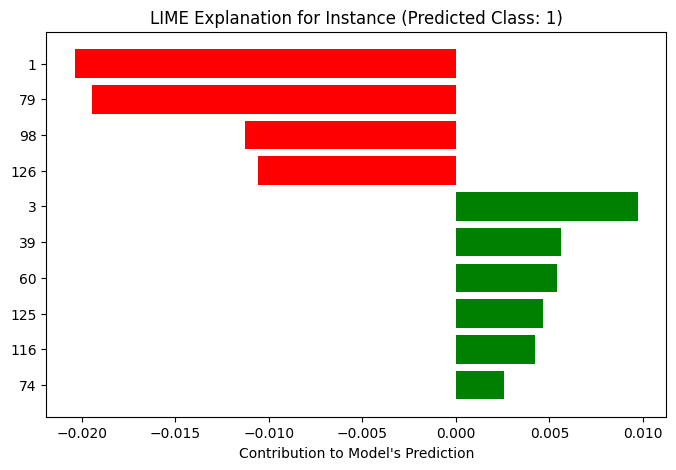

In [59]:
import matplotlib.pyplot as plt

features, contributions = zip(*explanation_list)
# contributions > 0 push the prediction toward predicted_class
# contributions < 0 push it away

colors = ['green' if c > 0 else 'red' for c in contributions]

plt.figure(figsize=(8, 5))
plt.barh(range(len(contributions)), contributions, color=colors)
plt.yticks(range(len(features)), features)
plt.xlabel("Contribution to Model's Prediction")
plt.title(f"LIME Explanation for Instance (Predicted Class: {predicted_class})")
plt.gca().invert_yaxis()  # so the top feature is at the top
plt.show()

In [60]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a list of feature names for better readability
feature_names = [f"Embedding_{i}" for i in range(X_train_embeddings.shape[1])]

# 2. Create the explainer with some custom settings
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_embeddings,
    training_labels=y_train,
    feature_names=feature_names,
    class_names=[str(i) for i in range(num_classes)],
    mode="classification",
    discretize_continuous=False
)

# 3. Pick an instance to explain
idx_to_explain = 42
instance_to_explain = X_test_embeddings[idx_to_explain]

# 4. Generate the explanation
explanation = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=xgb_model.predict_proba,
    num_features=10
)

# 5. Visualize inside notebook or save to HTML
explanation.show_in_notebook(show_table=True)
# explanation.save_to_file('lime_explanation.html')

# 6. (Optional) Build your own custom plot
predicted_class = xgb_model.predict(instance_to_explain.reshape(1, -1))[0]
explanation_list = explanation.as_list(label=predicted_class)

features, contributions = zip(*explanation_list)
colors = ['green' if c > 0 else 'red' for c in contributions]

plt.figure(figsize=(8, 5))
plt.barh(range(len(contributions)), contributions, color=colors)
plt.yticks(range(len(features)), features)
plt.xlabel("Contribution to Model's Prediction")
plt.title(f"LIME Explanation (Predicted Class: {predicted_class})")
plt.gca().invert_yaxis()
plt.show()

KeyError: 2